<h2 align="center"> Exploratory Data Analysis I</h2>

In this project, basic statistical queries and analysis were performed using the <a href='https://grouplens.org/datasets/movielens/latest/'>MovieLens Latest Datasets</a>


`Pandas` `DataFrame`  `Series`  `Seaborn`  `Statistical Data Visualization`   `Matplotlib`

### Ratings

In [119]:
import pandas as pd

ratings = pd.read_csv('ratings.csv', sep=',')
ratings.head() # DataFrame

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [120]:
print(ratings.shape[0], "rows")
print(ratings.shape[-1], "columns")

100836 rows
4 columns


##### Possible ratings using series object:

In [121]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

##### Frequency of each rating:

In [122]:
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

##### Plotting the above frequency as histogram:

<AxesSubplot:ylabel='Frequency'>

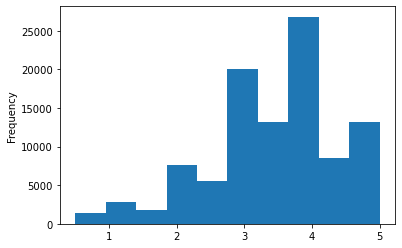

In [123]:
ratings.rating.plot(kind='hist')

In [124]:
print("Mean:",ratings['rating'].mean())
print("Median:",ratings['rating'].median())

Mean: 3.501556983616962
Median: 3.5


 Or in a simplified way:

In [125]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

##### Visualization as a boxplot:

<AxesSubplot:xlabel='rating'>

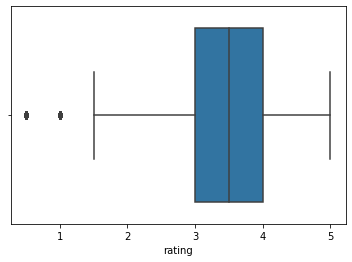

In [126]:
import seaborn as sns

sns.boxplot(ratings.rating)

Conclusion: Half of the given ratings are between 3 and 4

### Movies

In [127]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##### Looking at some specific ratings per movie:

In [128]:
ratings.query("movieId==1").rating.mean()

3.9209302325581397

In [129]:
ratings.query("movieId==2").rating.mean()

3.4318181818181817

##### Grouping DataFrame per movie:

In [130]:
means_per_movie= ratings.groupby("movieId").mean()["rating"]
means_per_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

##### Plotting as histogram and boxplot using seaborn/matplotlib:

<AxesSubplot:xlabel='rating'>

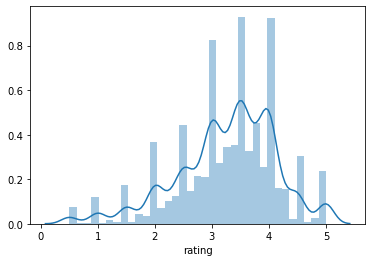

In [131]:
sns.distplot(means_per_movie, bins=35)

<AxesSubplot:title={'center':'Mean of rating per movie'}, ylabel='rating'>

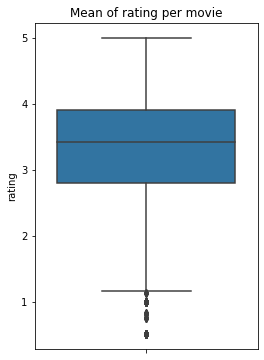

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,6))
plt.title('Mean of rating per movie')
sns.boxplot(y=means_per_movie)

#### Reviewing the role of the mean, median, standard deviation and boxplot:

In [133]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [135]:
rating_toy_story = ratings.query("movieId==1")
rating_jumanji = ratings.query("movieId==2")
print(len(rating_toy_story), len(rating_jumanji))

215 110


In [168]:
print("Mean rating of Toy Story is %.2f" % rating_toy_story.rating.mean())
print("Median rating of Toy Story is %.2f" % rating_toy_story.rating.median())
print("Std. deviation of rating of Toy Story is %.2f" % rating_toy_story.rating.std())
print(" ")
print("Mean rating of Jumanji is %.2f" % rating_jumanji.rating.mean())
print("Median rating of Jumanji is %.2f" % rating_jumanji.rating.median())
print("Std. deviation of rating of Toy Story is %.2f" % rating_jumanji.rating.std())

Mean rating of Toy Story is 3.92
Median rating of Toy Story is 4.00
Std. deviation of rating of Toy Story is 0.83
 
Mean rating of Jumanji is 3.43
Median rating of Jumanji is 3.50
Std. deviation of rating of Toy Story is 0.88


##### Plotting the distribution:

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83d8078b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83d8086220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83d8078790>,
 'medians': [<matplotlib.lines.Line2D at 0x7f83d80868b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f83d8086be0>,
 'means': []}

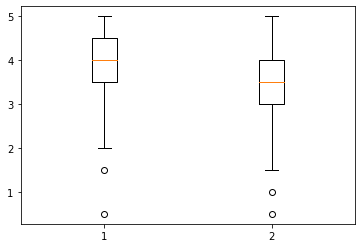

In [147]:
plt.boxplot([rating_toy_story.rating, rating_jumanji.rating])

<AxesSubplot:xlabel='movieId', ylabel='rating'>

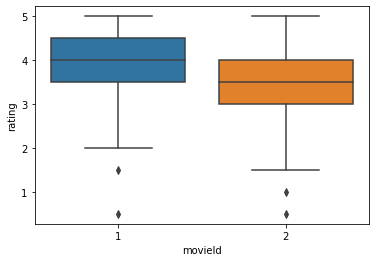

In [165]:
sns.boxplot(x= "movieId", y= "rating", data= ratings.query("movieId in [1,2]"))